In [ ]:
!pip install snscrape
!pip install pymongo

In [2]:
import os
import json
import pandas as pd
import datetime as dt
import snscrape.modules.twitter as sntwitter
import pymongo
import json


# Query "LasVegas" with Co-occurance of "nightlife". So that we can find out socializing preference of people in Las Vegas.

In [3]:
# Define the search query
search_query = "#LasVegas nightlife"

# Specify the maximum number of tweets to scrape
max_tweets = 10000

# Scrape the tweets and store them in a list
tweets = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(search_query).get_items()):
    if i >= max_tweets:
        break
    tweets.append(json.loads(tweet.json()))

# Connect to MongoDB

## Uncomment the following lines of code if you want to store the tweets in MongoDB

In [21]:

# # Connect to the MongoDB server using the MongoClient() function.
# client = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
# # Now let's create a database using the client object.
# db = client['Tweets']

# # Create collection
# collection = db['Tweetcollection']
# x = collection.insert_many(tweets)

In [ ]:
# Convert the list of tweets into a Pandas DataFrame
df2 = pd.DataFrame(tweets)

In [4]:
# Select the "date", "content", and...
df2 = df2[["date","rawContent","replyCount","retweetCount","likeCount","username"]]
# df2.to_csv('tweets.csv', index=False)

## Saved the tweets to not download it everytime

In [3]:
df2 = pd.read_csv("tweets.csv")

In [5]:
# convert date column to pandas datetime format
df2['date'] = pd.to_datetime(df2['date'])

# add weekday column
df2['weekday'] = df2['date'].dt.day_name()

#add a new column called 'tweet_number'
df2['tweet_number'] = df2.index + 1

In [12]:
df2

,date,rawContent,replyCount,retweetCount,likeCount,username,weekday,tweet_number
0,2023-04-08 20:20:23+00:00,TONIGHT in #LasVegas: @djcolette at The Usual ...,0,1,3,DeannaRilling,Saturday,1
1,2023-04-06 17:49:12+00:00,Boots for ramping🤣💃 #boots #lasvegas #peppermi...,0,0,0,angelaAchavez,Thursday,2
2,2023-04-05 23:19:46+00:00,Las vegas bartenders be like......... 😄😄😄😄 @lo...,0,0,1,LVKrayzie702,Wednesday,3
3,2023-04-05 09:17:01+00:00,Share the #Best #lasvegas content\nDownload th...,0,0,0,whatisbestnow,Wednesday,4
4,2023-04-05 09:16:55+00:00,#Best of the day on https://t.co/JMpv5fICLq\nW...,0,0,1,BestTLD,Wednesday,5
...,...,...,...,...,...,...,...,...
9995,2016-01-19 19:54:11+00:00,Nightlife in Vegas! This town never sleeps!\n...,0,0,4,vegassefie,Tuesday,9996
9996,2016-01-19 19:53:56+00:00,Introducing Empire Nightlife Las Vegas! #clubc...,0,0,1,empirecrawllv,Tuesday,9997
9997,2016-01-19 16:10:58+00:00,#nevada #lasvegas #vegas #casino We like the n...,0,0,1,bovinzorin,Tuesday,9998
9998,2016-01-19 01:25:34+00:00,Amazing Aria....\n----------------------------...,0,0,3,CarolKurth,Tuesday,9999


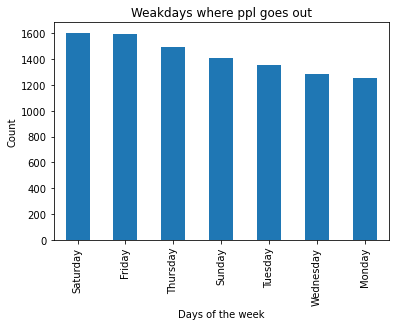

In [6]:
# Create a bar plot of the weekdays
import matplotlib.pyplot as plt

weekday_counts = df2['weekday'].value_counts()
weekday_counts.plot(kind='bar')

# Set the title and axis labels
plt.title('Weakdays where ppl goes out')
plt.xlabel('Days of the week')
plt.ylabel('Count')

# Show the plot
plt.show()

# Normalize the frequency distribution

Saturday     0.1604
Friday       0.1597
Thursday     0.1493
Sunday       0.1411
Tuesday      0.1355
Wednesday    0.1284
Monday       0.1256
Name: weekday, dtype: float64


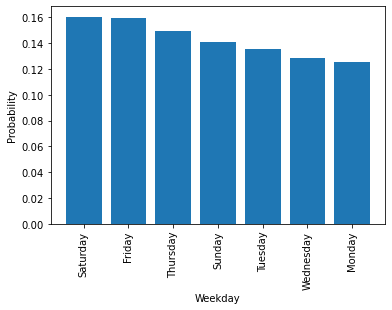

In [7]:
weekday_probabilities = weekday_counts / weekday_counts.sum()
print(weekday_probabilities)

# create a histogram of the weekday distribution
plt.bar(weekday_probabilities.index, weekday_probabilities.values)
plt.xlabel('Weekday')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.show()

In [8]:
import pandas as pd
import re

# extract unique hashtags from each row
unique_hashtags = df2['rawContent'].apply(lambda x: set(re.findall(r'\b\w+#?\w+\b', x.lower())))

# count the occurrence of each unique hashtag
top_hashtags = pd.Series([hashtag for hashtags in unique_hashtags for hashtag in hashtags]).value_counts()

# delete some unneccessary tags
top_hashtags = top_hashtags.drop(labels=top_hashtags.head(33).index)
top_hashtags = top_hashtags.drop(labels=top_hashtags.head(15).index[3:])
top_hashtags = top_hashtags.drop(labels=top_hashtags.head(27).index[4:])
top_hashtags = top_hashtags.drop(labels=top_hashtags.head(20).index[5:])
top_hashtags = top_hashtags.drop(labels=top_hashtags.head(15).index[6:])
top_hashtags = top_hashtags.drop(labels=top_hashtags.head(27).index[7:])
top_hashtags = top_hashtags.drop(labels=top_hashtags.head(14).index[8:])

# Add those tags which is the same but in different syntax
top_hashtags["hakkasan"] = top_hashtags["hakkasan"] + top_hashtags["hakkasanlv"] 
top_hashtags["omnia"] = top_hashtags["omnia"] + top_hashtags["omnialv"]
top_hashtags = top_hashtags.drop("hakkasanlv")
top_hashtags = top_hashtags.drop("omnialv")
top_hashtags = top_hashtags.drop("vegasbound")

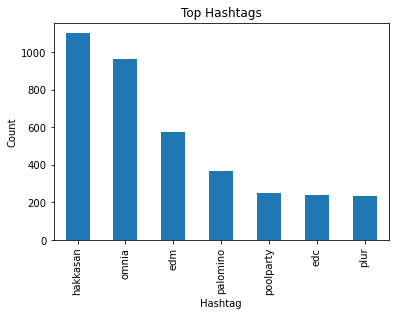

In [9]:
top_hashtags_new = top_hashtags.head(7)

# Create a bar plot of the top hashtags
top_hashtags_new.plot(kind='bar')

# Set the title and axis labels
plt.title('Top Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')

# Show the plot
plt.show()